INF101 - Introdução à Programação II  
PER-2  
**Prática 01 - Arranjos e Processamento de Imagens**  

---
- Estudante: *Déric Augusto França de Sales* (*deric.sales@ufv.br*)
- Matrícula: *96718*  
- Data: 04 / 02 / 2021  
- Atualização: 04 / 02 / 2021
---

## Descrição do programa:

Este programa coleta uma imagem através de um link e a processa gerando outras duas imagens como saída. Na primeira é aplicado um filtro de tons de cinza e a segunda um filtro de embossing.  

Para a aplicação de ambos os filtros foram criadas funções que geram os efeitos fazendo uso da classe Imagem(), disponibilizada como recurso para a atividade.

# Classe Imagem

Não alterar esse código.

In [ ]:
# ATENÇÂO:
# Não modifique esse código.
# 
# Métodos disponíveis:
# mostrar()
# copia()
# salvar( $NOME-DO-ARQUIVO$ )

from PIL import Image

import urllib
import requests
from urllib.error import HTTPError

class Imagem(object):

    largura = altura = 0

    def initVars( self ):
        self._inGetSet = False
        self._y = 0
    
    def abrir( self, filename ):
        self.initVars()

        try: # valid URL
            f = urllib.request.urlopen(filename)
            print('Abrindo imagem de URL.')

            self.im = Image.open(requests.get(filename, stream=True).raw)

        except ( ValueError , HTTPError ):  # invalid URL
            print('Abrindo imagem de arquivo.')

            try :
              self.im = Image.open( filename ) 
            except FileNotFoundError :
              print( 'Arquivo não existe. Tenha certeza de que foi feito o'
                     ' upload deste arquivo na seção atual. Para isso, '
                     'verifique se o mesmo está na pasta do Google Colab.' )
              raise NameError('Arquivo não encontrado.')
            
        self.largura, self.altura = self.im.size
        
    def __init__( self, filename='' ):
        if filename == '':
            self.initVars()
        else: self.abrir( filename )
        
    def mostrar( self ):
        # self.im.show()
        display(self.im)
        
    def copia( self ):
        im2 = Imagem()
        im2.im = self.im.copy()
        im2.largura = self.largura
        im2.altura = self.altura
        return im2
        
    def salvar( self, filename ):
        self.im.save( filename, 'png')
        
    def __getitem__(self, yx):
        if self._inGetSet:
            self._inGetSet = False
            return self.im.getpixel( (yx, self._y) )
        else:
            self._inGetSet = True
            self._y = yx
            return self
    
    def __setitem__(self, yx, pixel):
        if self._inGetSet:
            self._inGetSet = False
            self.im.putpixel( (yx, self._y), pixel )
        else:
            self._inGetSet = True
            self._y = yx
            return self

# Solução da aula prática

Implemente aqui a função `tonal( imagem )` que recebe uma imagem como parâmetro e retorna a imagem em tons de cinza.

In [ ]:
def tonal( imagem_colorida ) :

  for l in range( 0 , imagem_colorida.altura ) :
    for c in range( 0 , imagem_colorida.largura ) :

      R,G,B = imagem_colorida[l][c]

      luminancia = int(0.299*R + 0.587*G + 0.114*B)
      imagem_colorida[l][c] = (luminancia, luminancia, luminancia)

  return imagem_colorida

Implemente aqui a função `emboss( imagem )` que recebe uma imagem em tons de cinza e retorna a imagem embossed.

In [49]:
def emboss( imagem ) :
	
  filtro = [[-1,-1, 0],
            [-1, 0, 1],
            [ 0, 1, 1]]

  im2 = imagem.copia()

  for l in range( 1 , imagem.altura-1 ) :
    for c in range( 1 , imagem.largura-1 ) :
      pix = 0

      for i in range(0,3):
        for j in range(0,3):

          R,G,B = imagem[l+(i-1)][c+(j-1)]

          pix = pix + R*filtro[i][j]

      pix = max(0,min(255, pix+128))
      im2[l][c] = (pix,pix,pix)

  return im2         


Implemente aqui a função `main()` que abre uma imagem usando a Classe `Imagem`, transforma a imagem em tons de cinza, e chama o método emboss.

In [ ]:
def main():
        
    # Faça o upload do arquivo imagem e use os seguintes comandos:
    # image_path = 'fruits-700.jpg'

    # Ou leia a imagem da internet
    image_path = 'https://www.gannett-cdn.com/-mm-/92cf2cec00ba2b4a1bdd16c13e7d7e870b2efff4/c=0-109-2124-1304/local/-/media/CherryHill/2014/10/04/185689360.jpg?auto=webp&format=pjpg&width=1200'
    
    # Lê o arquivo com a imagem original e a coloca na matriz im.
    im = Imagem(image_path)
    im.mostrar()
    # Produz a imagem em tons de cinza em im1 a partir de im.
    print("Tons de cinza...")
    im1 = tonal(im)
    im1.mostrar()

    # Produz o embossing da imagem em im2 a partir de im1.
    print("Embossing...")
    im2 = emboss(im1)
    im2.mostrar()
    
    print("Fim do processamento!")

Chama a função `main()` para iniciar o processo.

Abrindo imagem de URL.


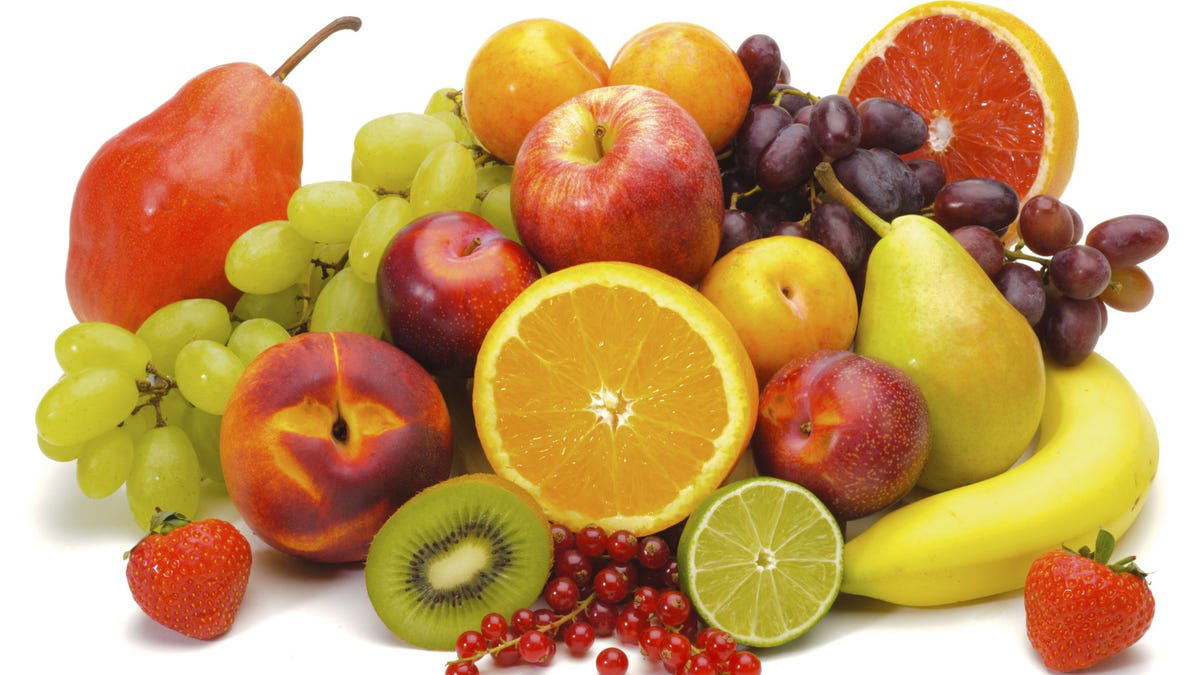

Tons de cinza...


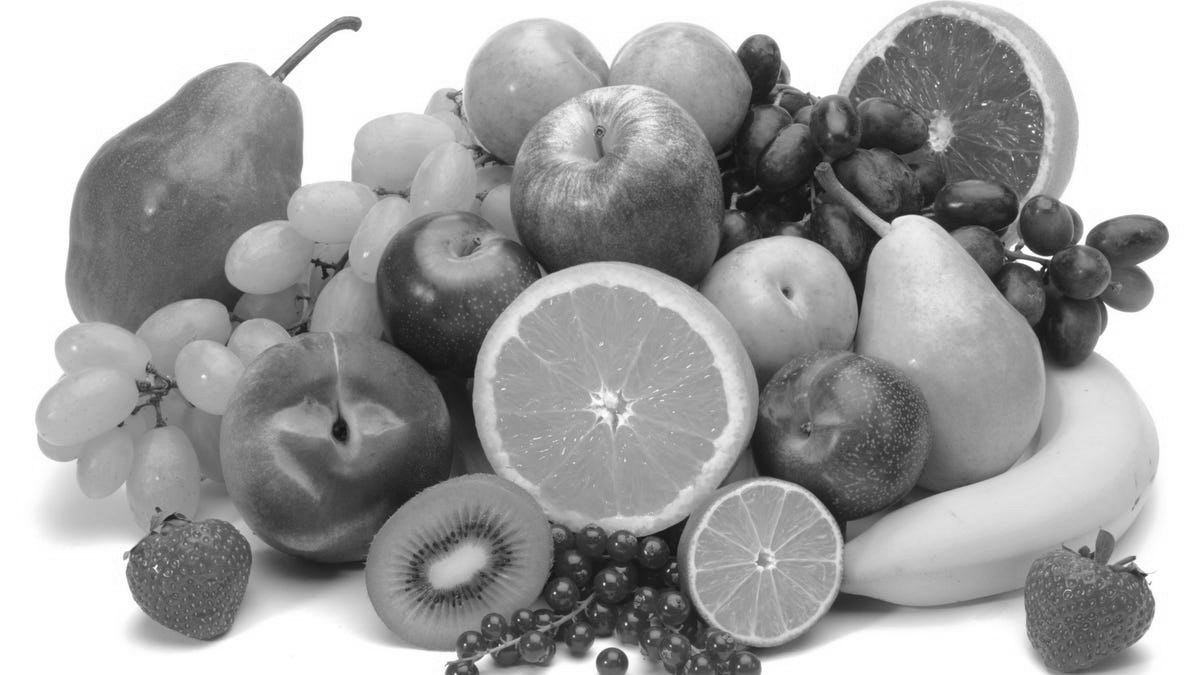

Embossing...


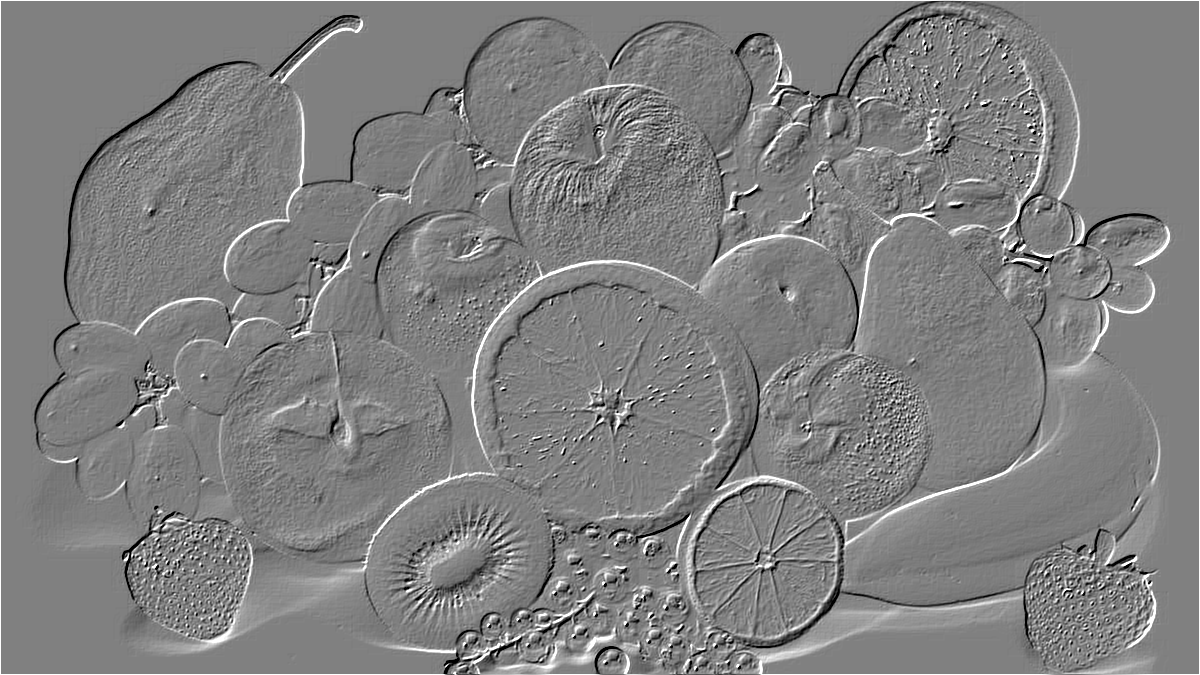

Fim do processamento!


In [50]:
main()